# Day 7: Introduction to Machine Learning

This notebook covers the basics of Machine Learning and scikit-learn.

## 1. Setting up the Environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)
# print(np.random.rand(3))
# print(np.random.randint(1,10,5))

[0.33370861 0.14286682 0.65088847]
[5 2 8 6 2]


## 2. Types of Machine Learning

### Machine Learning Categories:

1. Supervised Learning:
   - Classification (predict discrete categories)
   - Regression (predict continuous values)

2. Unsupervised Learning:
   - Clustering
   - Dimensionality Reduction
   - Association

3. Semi-Supervised Learning:
   - Combination of labeled and unlabeled data

4. Reinforcement Learning:
   - Learning through interaction with environment

## 3. Machine Learning Workflow

In [7]:
# 1. Data Generation (simulated data for house prices)
n_samples = 1000
size = np.random.normal(1500, 300, n_samples)  # house size in sq ft
age = np.random.uniform(0, 50, n_samples)      # house age in years
price = 150000 + 100 * size - 2000 * age + np.random.normal(0, 10000, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'size': size,
    'age': age,
    'price': price
})

# Display first few rows
print("Sample of the dataset:")
print(data.head())

# Basic data exploration
print("\nBasic statistics:")
print(data.describe())
print(data.info())

Sample of the dataset:
          size        age          price
0  1392.111098  14.209215  258910.066904
1  1590.332202  14.448426  292067.497142
2  1555.150355  18.852697  278024.796317
3  2307.910099  19.666034  350648.091427
4  1604.940007  27.227766  251441.900549

Basic statistics:
              size          age          price
count  1000.000000  1000.000000    1000.000000
mean   1498.512998    24.830483  250014.936119
std     310.495272    14.453383   44395.243163
min     602.659209     0.047171  115695.846941
25%    1284.827450    12.614264  217933.594886
50%    1499.592373    24.183958  250846.984359
75%    1705.769176    37.082075  280037.771595
max    2677.871312    49.967515  395046.183615
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    1000 non-null   float64
 1   age     1000 non-null   float64
 2   price   1000 non-null   float64

## 4. Data Preprocessing and Splitting

In [10]:
# Separate features (X) and target (y)
X = data[['size', 'age']]
y = data['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print(X_train.head())
print(X_test.head())
print("Testing set shape:", X_test.shape)

Training set shape: (800, 2)
            size        age
29   1481.398797   5.434127
535  1672.221366  20.282263
695  1339.404986  38.793863
557  1450.310577  17.103472
836  1626.463825  33.809787
            size        age
521  2196.012217  47.418478
737  1978.332718  36.796020
740  1485.291198  17.048099
660  1505.645715  40.581351
411  1635.367596  20.966734
Testing set shape: (200, 2)


## 5. Training the Model

In [11]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Model Coefficients:
size: 99.86
age: -1998.44
Intercept: 150284.46


## 6. Model Evaluation

Model Performance Metrics:
Mean Squared Error: 95685027.97
Root Mean Squared Error: 9781.87
R² Score: 0.9509


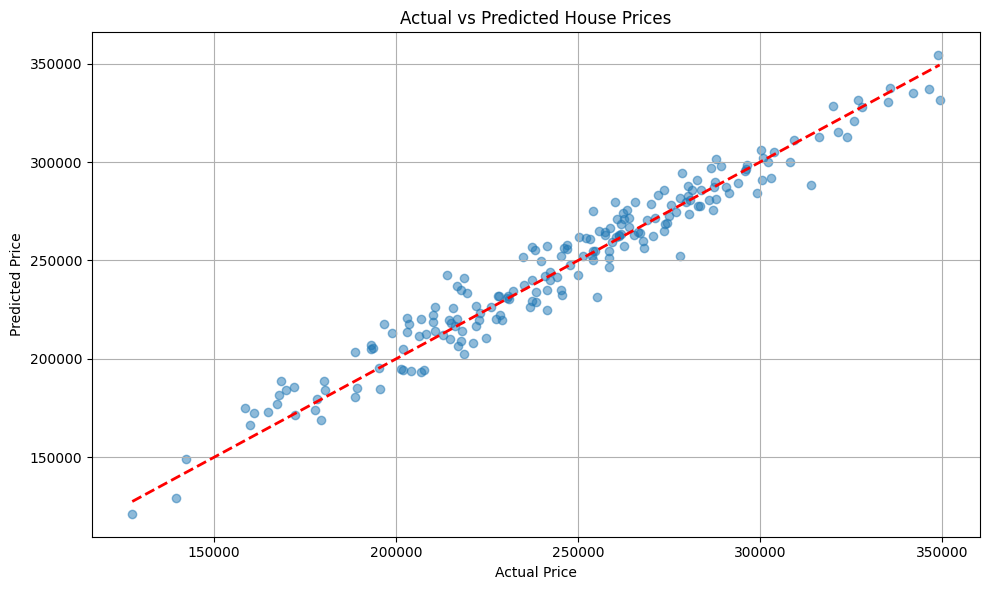

In [13]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.grid(True)
plt.show()

## 7. Making Predictions

In [ ]:
# Create sample houses
sample_houses = pd.DataFrame({
    'size': [1200, 1800, 2500],
    'age': [5, 15, 30]
})

# Make predictions
predictions = model.predict(sample_houses)

# Display results
sample_houses['predicted_price'] = predictions
print("Sample Predictions:")
print(sample_houses)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.bar(X.columns, np.abs(model.coef_))
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Features')
plt.ylabel('|Coefficient|')
plt.show()

## 8. Cross-Validation

In [12]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:")
print(cv_scores)
print(f"\nMean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores:
[0.95426573 0.94244375 0.95336264 0.95176183 0.95342907]

Mean CV Score: 0.9511 (+/- 0.0088)
